[6.66658281e+01 9.73251631e-03]
[0.0019024  0.01355932]


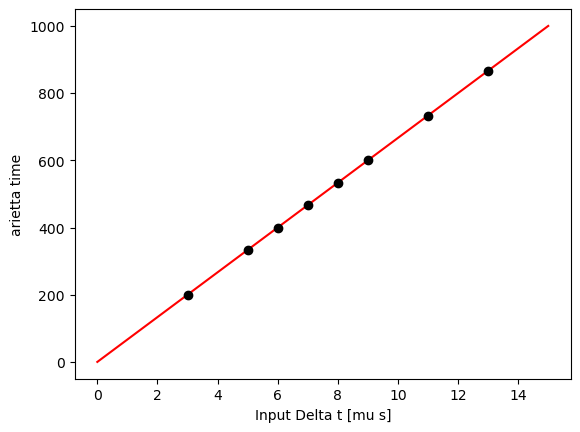

In [2]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

def linear_model(x,a,b):
    return a*x+b

Time=[5,6,7,8,11,13,3,9] #time in microseconds between the 2 signals send from picoscope
Counts = [300,300,300,300,300,300,300,300] 
Mean=[333.33,400.02,466.67,533.34,733.32,866.67,200.00,599.997] #arietta time
MeanSTD=[0.03,0.01,0.03,0.03,0.03,0.03,0.01,0.009]

x=np.array(Time)
y=np.array(Mean)
sy=np.array(MeanSTD)


par, cov= curve_fit(linear_model, x,y, sigma=sy, absolute_sigma=True)

print(par)
#print(cov)

per = np.sqrt(np.diag(cov))

print(per)

pendenza = par[0]
intercetta = par[1]

xx=np.linspace(0,15,1000)
plt.errorbar(x,y,yerr=sy, label="points", color='black', fmt='o')
plt.plot(xx,linear_model(xx,par[0],par[1]), color='red', label='fit')
plt.xlabel('Input Delta t [mu s]')
plt.ylabel('arietta time')

#plt.savefig("arietta-calibration.pdf")
plt.show()


2920


/tmp/ipykernel_2770/2173876859.py:54: RuntimeWarning: overflow encountered in exp
  return amp*np.exp(-1*gamma*x)+fondo
/tmp/ipykernel_2770/2173876859.py:54: RuntimeWarning: overflow encountered in multiply
  return amp*np.exp(-1*gamma*x)+fondo


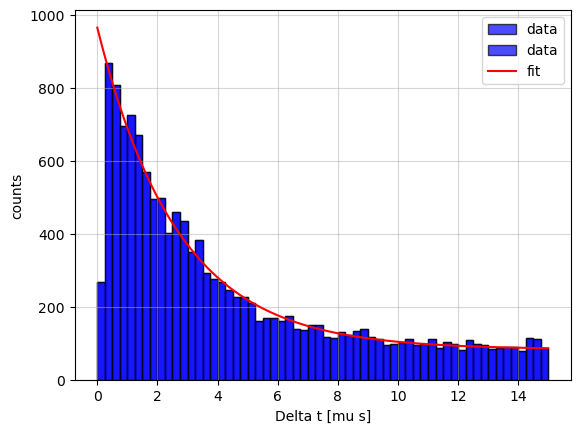

[3.74260911e-01 8.81656280e+02 8.30262565e+01]
[1.32320827e-02 1.64169300e+01 5.47403882e+00]
muon lifetime is  2.6719327932268504  pm 0.0944668133824294  microsecondi


In [3]:
import glob
import matplotlib.pyplot as plt

import numpy as np

cartella = "../Data/Fondo"

file_dat = glob.glob(f"{cartella}/*.dat") #questo restituisce una stringa con i path dei file che si vogliono unire

output_file = "output.txt"

data = []

with open(output_file,"w") as output:

    for file in file_dat:
        with open(file,"r") as file:
            for line in file:
                data.append(float(line))
                output.write(line)

array = np.array(data)

array_time=[]
array_time_cut=[]

for i in data:
    array_time.append((i-intercetta)/pendenza)
    if i > 8:
        array_time_cut.append((i-intercetta)/pendenza)

np_array_time = np.array(array_time)
np_array_time_cut= np.array(array_time_cut)

j=0
for i in np_array_time_cut:
    if i <1.1:
        j=j+1 

print(j)


#plt.hist(array, bins=98, range=(20,1000), color="blue", edgecolor="black", alpha=0.7)

Nbins=60

hist,bins= np.histogram(np_array_time_cut, bins=Nbins)
bin_centers = (bins[:-1] + bins[1:]) / 2 
#bins[:-1] crea un array con tutti gli elementi di bins meno l'ultimo
#bins[1:] crea un array con tutti gli elementi di bins meno il primo
#->sommando i due array (la somma è element wise) ottengo la somma del limite destro e sinitro di ogni bin

def exponential(x, gamma, amp, fondo):
    return amp*np.exp(-1*gamma*x)+fondo
plt.hist(np_array_time_cut, bins=Nbins, range=(0,15), color="blue", edgecolor="black", alpha=0.7, label='data')

initial_guess = [2.1, 100, 10]

par_exp, cov_exp = curve_fit(exponential, bin_centers, hist,p0=initial_guess, maxfev = 2000)

per_exp= np.sqrt(np.diag(cov_exp))

fondo=par_exp[2]
amp=par_exp[1]
gamma=par_exp[0]
gamma_err=per_exp[0]

x_range=np.linspace(0,15,1000)

plt.hist(np_array_time_cut, bins=Nbins, range=(0,15), color="blue", edgecolor="black", alpha=0.7, label='data')
plt.grid(alpha=0.5)
plt.xlabel('Delta t [mu s]')
plt.ylabel('counts')
#plt.yscale('log')

plt.plot(x_range,exponential(x_range, gamma, amp, fondo), color='red', label='fit')
plt.legend()
plt.show()

print(par_exp)
print(per_exp)
print('muon lifetime is ',1./gamma, ' pm' , gamma_err/(gamma**2) , ' microsecondi')


In [4]:
import ROOT
%jsroot on
from ROOT import gROOT
ROOT.gROOT.LoadMacro("RooFit_prova.C") 
canvas=ROOT.TCanvas("ciao","ciao")
canvas.cd()

ROOT.RooFit_prova()


canvas.Draw()

[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #6 because cal_time_var cannot accommodate the value 0.254857
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #16 because cal_time_var cannot accommodate the value 0.224857
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #40 because cal_time_var cannot accommodate the value 0.46486
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #47 because cal_time_var cannot accommodate the value 0.434859
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data) Ignored 1134 out-of-range events
[#1] INFO:Fitting -- RooAbsPdf::fitTo(model) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- using CPU computation library compiled with -mavx2
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_data) Summation co

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       31906.86122 Edm =       3257.642827 NCalls =     13
Info in <Minuit2>: NegativeG2LineSearch Doing a NegativeG2LineSearch since one of the G2 component is negative
Info in <Minuit2>: MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 31906.10809
  Edm           : 3253.976129
  Internal parameters:	[      1.496276737      0.927295218      -0.55790704]	
  Internal gradient  :	[  -0.007558531982      4178.860337       -1174.0947]	
  Internal covariance matrix:
[[      19.989462              0              0]
 [              0  0.00022955606              0]
 [              0              0   0.0065340628]]]
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 31906.10809
  Edm           : 3253.976129
  Internal parameters:	[      1.496276737      0.927295218      -0.55790704]	
  Internal gradient  :	[  -0.0075585319